## Hoja de trabajo 6 ##
**José Hurtarte 19707**  
**Andrei Portales 19825**  
**Christian Pérez 19710**  

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [136]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)
# test = pd.read_csv('data/test.csv')

In [137]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
# train columns
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Filtrado de categorías cara, mediana y económica

In [139]:
low_price_limit = data.SalePrice.quantile(0.33)
mid_price_limit = data.SalePrice.quantile(0.67)

(low_price_limit, mid_price_limit)

(139000.0, 191000.0)

In [140]:
data['PriceRangeInt'] = 1
data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2
data['PriceRangeInt']

C:\Users\josej\AppData\Local\Temp\ipykernel_27020\716762574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] < low_price_limit] = 0
C:\Users\josej\AppData\Local\Temp\ipykernel_27020\716762574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRangeInt'][data['SalePrice'] > mid_price_limit] = 2


0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: PriceRangeInt, Length: 1460, dtype: int64

In [141]:

data['econ'] = np.where(data['PriceRangeInt'] == 0, 1, 0)
data['med'] = np.where(data['PriceRangeInt'] == 1, 1, 0)
data['exp'] = np.where(data['PriceRangeInt'] == 2, 1, 0)

data[['PriceRangeInt', 'econ', 'med', 'exp'] ]


,PriceRangeInt,econ,med,exp
0,2,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,0,1,0
4,2,0,0,1
...,...,...,...,...
1455,1,0,1,0
1456,2,0,0,1
1457,2,0,0,1
1458,1,0,1,0


## Análisis de variables a incluír en modelos

In [142]:
CUANTITATIVES = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


predictors_1 =['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']
data[predictors_1]

,GrLivArea,GarageCars,TotalBsmtSF,OverallQual
0,1710,2,856,7
1,1262,2,1262,6
2,1786,2,920,7
3,1717,3,756,7
4,2198,3,1145,8
...,...,...,...,...
1455,1647,2,953,6
1456,2073,2,1542,6
1457,2340,1,1152,7
1458,1078,1,1078,5


<AxesSubplot:>

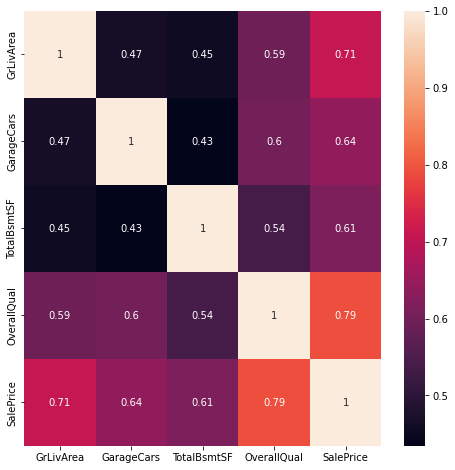

In [143]:
plt.subplots(figsize = (8,8))
sns.heatmap(data[predictors_1 + ['SalePrice']].corr(), xticklabels=data[predictors_1 + ['SalePrice']].corr().columns, yticklabels=data[predictors_1 + ['SalePrice']].corr().columns, annot=True)


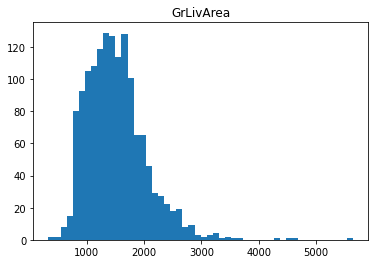

In [144]:
plt.hist(data['GrLivArea'], bins=50)
plt.title("GrLivArea")
plt.show()

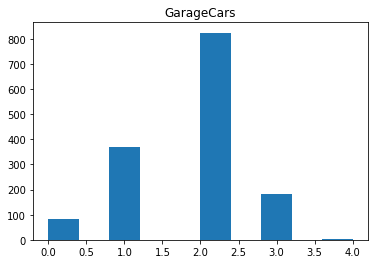

In [145]:
plt.hist(data['GarageCars'])
plt.title("GarageCars")
plt.show()

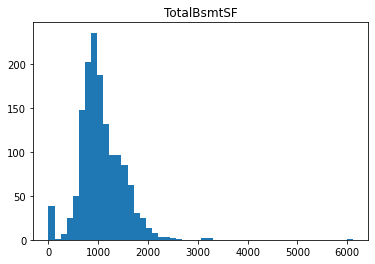

In [146]:
plt.hist(data['TotalBsmtSF'], bins=50)
plt.title("TotalBsmtSF")
plt.show()

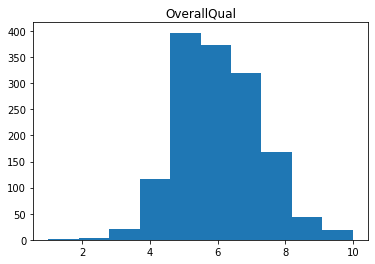

In [147]:
plt.hist(data['OverallQual'])
plt.title("OverallQual")
plt.show()

#### Podemos observar que la mayoría de los datos tienden a ser normales, sin embargo garage cars no debido a los pocos datos, y también TotalBsmtSF tiene del todo clara una distribución normal, sin embargo estas pueden ser buenas predictoras ya que tienen una alta correlación, por lo que se pueden tomar. Además, otra razón por las cuales se escogieron estas variables, es debido a que son las que tienen una alta correlación con la variable SalePrice y que no tuviesen correlación entre sí para evitar un overfitting. También se tomaron variables como OverallQual, que al agregar un peso a la calidad de la casa genera una correlación muy fuerte con el precio de venta, haciendola una muy buena variable predictora para nuestras variables dicotómicas de cara, mediana y económica. Además de manera lógica, todas estas variables se relacionan de manera directa si una casa es cara o barata. También se omite SalePrice, debido a que como esa variable contribuye de manera directa a los datos que deseamos predecir, causaría un overfit si se toma en cuenta como predictora.

## Modelo 1 Regresion logistica para casas Económicas

### Separación de conjuntos de prueba y entrenamiento

In [148]:
# Data con variables
data_vars = data[predictors_1  + ['econ']]

data_vars = data_vars.dropna()
data_vars.columns

Index(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', 'econ'], dtype='object')

In [149]:
y = data_vars.pop('econ') #La variable respuesta
X = data_vars #El resto de los datos

In [150]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

In [151]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

In [152]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con bajo precio\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas con bajo precio
 [[280  25]
 [ 32 101]]
Accuracy:  0.8698630136986302


#### Podemos observar que la matriz de confusión para nuestros datos de predicción de casas baratas tiene una presición del 87% siendo este un indicador que nos dice que si se logra predecir de manera bastante confiable si una casa es barata con nuestras variables predictoras. Esto se puede observar en la matriz de confusión ya que la mayoría de los datos están colocados en la diagonal de la matriz, indicandonos que fueron predecidos de manera correcta.

In [153]:

X_test['econ'] = y_pred


X_test


,GrLivArea,GarageCars,TotalBsmtSF,OverallQual,econ
147,2035,2,884,7,0
676,1774,3,1095,4,0
1304,1708,2,976,7,0
1372,2097,2,1108,7,0
1427,1558,1,913,5,1
...,...,...,...,...,...
908,902,2,864,5,1
1096,1355,0,684,6,1
637,1387,1,811,5,1
753,2098,3,1030,8,0


### Visualización de datos

In [154]:
# Append SalePrice to X_test by id
X_test['SalePrice'] = data['SalePrice']



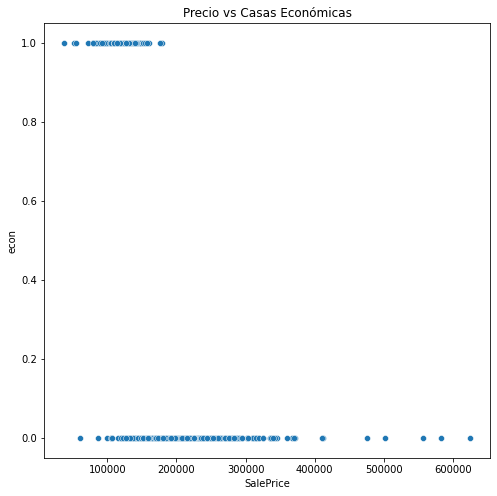

In [155]:

plt.subplots(figsize = (8,8))
sns.scatterplot(x='SalePrice', y='econ', data=X_test)
plt.title("Precio vs Casas Económicas")
plt.show()


#### Aquí se puede observar una alta tendencia de los datos a quedar agrupados con el grupo económico cuando el precio está al inicio, siendo esto un buen indicador de que los datos de las variables predictoras tienen un buen desempeño agrupando casas baratas y que la regresión logistica para las casas baratas es bastante buena. Esto se puede deber a que las variables escogidas si nos pueden decir que tan barata o cara estará una casa, siendo este un indicador directo, por lo que la regresión logistica si actua de manera correcta, además se observan pocos puntos poco probables de otras categorías en el precio de las casas baratas.

## Modelo 2 Regresion logistica para casas Medianas

### Separación de conjuntos de prueba y entrenamiento

In [156]:
# Data con variables
data_vars = data[predictors_1  + ['med']]

data_vars = data_vars.dropna()
data_vars.columns

Index(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', 'med'], dtype='object')

In [157]:
y = data_vars.pop('med') #La variable respuesta
X = data_vars #El resto de los datos

In [158]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

In [159]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

In [160]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con precio mediano\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas con precio mediano
 [[283   2]
 [152   1]]
Accuracy:  0.6484018264840182


#### La matriz de confusión para casas con precio mediano nos dicen que este modelo tuvo una presición del 65%, lo cual significaría que aproximadamente 2/3 de los datos fueron predecidos de manera correcta. Sin embargo esto es erroneo, podemos observar que las casas predecidas que no son medianas solo tuvieron 2 que fueron predecidas de manera erronea, sin embargo solo 1 dato de 152 fue predicho de manera correcta en esta muestra, diciendonos así que este modelo no es confiable para predecir las casas con precio mediano. A simple vista se podría observar esto con el simple hecho de que la mayoría de los datos no están centrados en la diagonal de la identidad de la matriz.

### Visualización de datos

In [161]:

# append y_pred to X_test and print it
X_test['med'] = y_pred


X_test


,GrLivArea,GarageCars,TotalBsmtSF,OverallQual,med
147,2035,2,884,7,0
676,1774,3,1095,4,0
1304,1708,2,976,7,0
1372,2097,2,1108,7,0
1427,1558,1,913,5,0
...,...,...,...,...,...
908,902,2,864,5,0
1096,1355,0,684,6,0
637,1387,1,811,5,0
753,2098,3,1030,8,0


In [162]:

X_test['SalePrice'] = data['SalePrice']



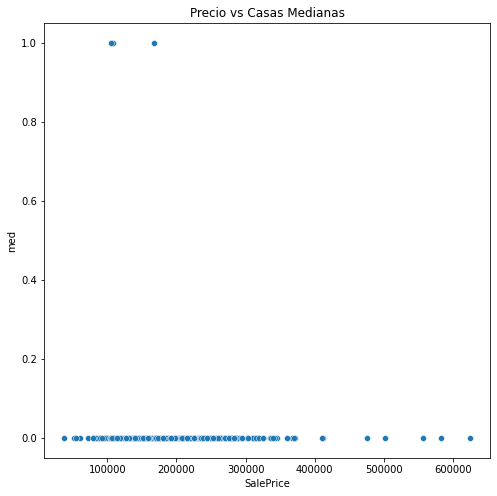

In [163]:

plt.subplots(figsize = (8,8))
sns.scatterplot(x='SalePrice', y='med', data=X_test)
plt.title("Precio vs Casas Medianas")
plt.show()

#### Aquí se puede observar una alta tendencia de los datos a quedar fuera del grupo mediano, a pesar de que en realidad este sea el grupo predominante de los datos, teniendo este un comportamiento no esperado al de datos en una regresión logistica. Esto se debe principalmente a que las variables predictoras, nos sirven para medir que tan cara o barata es una casa y no que tendencia tiene a ser una casa mediana. Debido a esto no hay un patron observable en este modelo.

## Modelo 3 Regresion logistica para casas de alto precio

### Separación de conjuntos de prueba y entrenamiento

In [164]:
# Data con variables
data_vars = data[predictors_1  + ['exp']]

data_vars = data_vars.dropna()
data_vars.columns

Index(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', 'exp'], dtype='object')

In [165]:
y = data_vars.pop('exp') #La variable respuesta
X = data_vars #El resto de los datos

In [166]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)

In [167]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)

In [168]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas caras\n',cm)
print('Accuracy: ',accuracy)

Matriz de confusión para detectar casas caras
 [[277   9]
 [ 34 118]]
Accuracy:  0.9018264840182648


#### Podemos observar en la matriz de confusión de estos datos que hay una presición del 90% en la predicción de casas caras, además se observan que los datos están centrados en la diagonal de la identidad de la matriz y que hay muy pocos datos que fueron mal predecidos en las casillas (0,1) y (1,0). Por lo que se puede decir que esta predicción es altamente confiable.

### Visualización de datos

In [169]:

# append y_pred to X_test and print it
X_test['exp'] = y_pred


X_test


,GrLivArea,GarageCars,TotalBsmtSF,OverallQual,exp
147,2035,2,884,7,1
676,1774,3,1095,4,0
1304,1708,2,976,7,0
1372,2097,2,1108,7,1
1427,1558,1,913,5,0
...,...,...,...,...,...
908,902,2,864,5,0
1096,1355,0,684,6,0
637,1387,1,811,5,0
753,2098,3,1030,8,1


In [170]:

X_test['SalePrice'] = data['SalePrice']



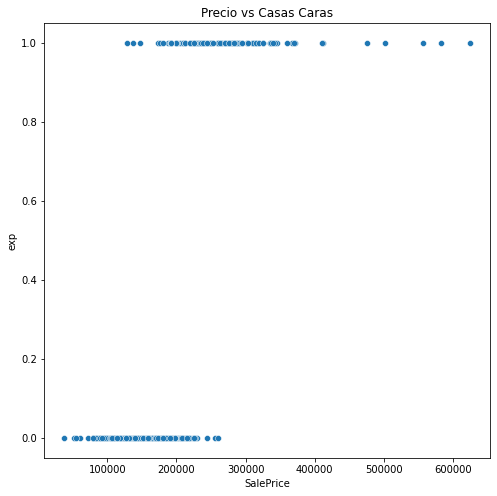

In [171]:

plt.subplots(figsize = (8,8))
sns.scatterplot(x='SalePrice', y='exp', data=X_test)
plt.title("Precio vs Casas Caras")
plt.show()


#### Aquí se puede observar una alta tendencia de los datos a quedar agrupados con el grupo de casas caras hacia la derecha comparado con el precio. Esto a simple vista nos dice que las variables predictoras si tienen una alta relación con el precio de venta y también con la clasificación si la casa es de alto precio. También se observan muy pocos datos atípicos o poco probables en precios bajos clasificados como caros y visceversa, debido a esto el modelo de manera visual se adapta de una manera correcta al modelo de regresión logistica.

## Comparación de la eficiencia de los algoritmos

#### Podemos ver que 2 de los 3 modelos realizados arrojan muy buenos resultados, siendo estos el de predicción de casas caras, con un 87% de precisión, y casas baratas, con un 90% de precisión. El modelo de predicción de casas de precio mediano es el que más tendió a equivocarse, y a pesar de que tuviese una presición del 65%, este logro predecir únicamente el 0.6% de las casas medianas correctamente. La mala predicción de las casas medianas es principalmente debido a que nuestras variables predictoras no indican de manera directa que tanta tendencia tiene esa casa a tener un precio mediano, ya que todas estas variables tienen principalmente relación con que tan barata o cara puede ser una casa, explicando así, el porqué del mal desempeño de los datos de casas medianas y el buen desempeño de las predicciones de casas caras o baratas. Por lo que se recomienda incluír algún tipo de variable predictora que indique que tanta tendencia tiene una casa a tener un precio mediano y también a únicamente útilizar los modelos de casas caras y baratas con regresón logistica y las variables predictoras utilizadas para predecir datos, ya que así se harán de manera confiable.